## 9.クラスター分析

In [ ]:
# ライブラリのインポート
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

データを読み込みます

In [ ]:
df_original = pd.read_csv("clst.csv",encoding = "shift-jis",index_col=0)
df_original.head()

,forest,highest_temp,lowest_temp,rainfall,latitude,longitude,altitude,moisture,country,staplefood
ID,,,,,,,,,,
1,68.5,26.4,5.2,1529,35.40,139.44,25.2,65.0,日本,コメ
2,23.8,33.2,14.1,768,28.38,77.13,211.0,54.0,インド,コメ
3,63.7,25.7,-2.4,1429,37.30,127.30,86.0,68.5,韓国,コメ
5,22.1,26.7,-3.1,534,39.56,116.17,55.0,60.0,中国,コメ
7,1.9,31.7,19.0,183,24.54,67.08,21.0,54.0,パキスタン,小麦


・階層的クラスタ分析  

デンドログラムの作成

In [ ]:
df=df_original[['forest', 'highest_temp', 'lowest_temp', 'rainfall', 'latitude',
       'longitude', 'altitude', 'moisture']]

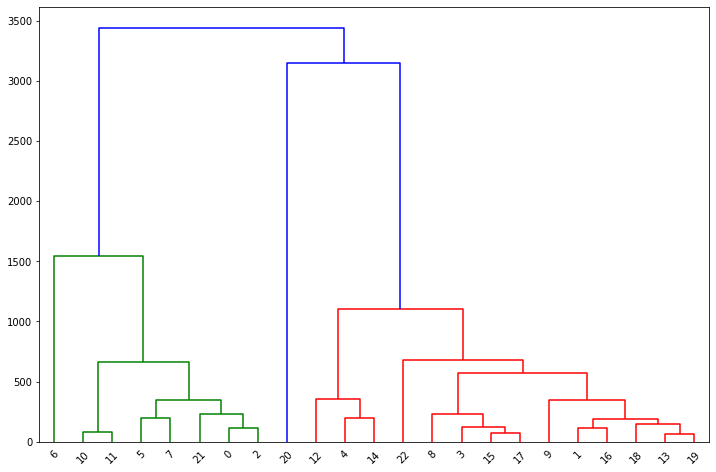

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

df_hclust = linkage(df, method="ward")
plt.figure(figsize=(12,8))
dendrogram(df_hclust)
plt.show()

・非階層的クラスタ分析  

kmenasを用いたクラスタ分析  
scikit-learnは直接pandasデータフレームを読み込まないのでnumpyの行列に変換する必要がある

In [ ]:
cust_array = np.array([df["forest"].tolist(),df["highest_temp"].tolist(),df["lowest_temp"].tolist(),
                      df["rainfall"].tolist(),df["latitude"].tolist(),df["longitude"].tolist(),
                      df["altitude"].tolist(),df["moisture"].tolist()],np.int32)

In [ ]:
cust_array = cust_array.T

In [ ]:
# クラスタ分析を実行 (クラスタ数=3)
pred = KMeans(n_clusters=3).fit_predict(cust_array)
pred

array([2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       0], dtype=int32)

In [ ]:
# クラスタ分析を実行 (クラスタ数=4)
pred2 = KMeans(n_clusters=4).fit_predict(cust_array)
pred2

array([0, 1, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1], dtype=int32)

In [ ]:
df_original['cluster_id_3groups'] = pred
df_original['cluster_id_4groups'] = pred2
df_original

,forest,highest_temp,lowest_temp,rainfall,latitude,longitude,altitude,moisture,country,staplefood,cluster_id_3groups,cluster_id_4groups
ID,,,,,,,,,,,,
1,68.5,26.4,5.2,1529,35.40,139.44,25.2,65.0,日本,コメ,2,0
2,23.8,33.2,14.1,768,28.38,77.13,211.0,54.0,インド,コメ,0,1
3,63.7,25.7,-2.4,1429,37.30,127.30,86.0,68.5,韓国,コメ,2,0
5,22.1,26.7,-3.1,534,39.56,116.17,55.0,60.0,中国,コメ,0,1
7,1.9,31.7,19.0,183,24.54,67.08,21.0,54.0,パキスタン,小麦,0,1
8,27.0,29.5,26.1,1788,14.31,121.00,14.0,75.0,フィリピン,コメ,2,0
9,67.6,28.0,26.7,2672,3.07,101.33,27.0,81.0,マレーシア,コメ,2,3
10,81.3,29.3,22.4,1682,17.57,102.34,171.0,75.2,ラオス,コメ,2,0
11,33.8,18.2,10.1,517,37.37,-122.23,6.0,66.5,アメリカ合衆国,トウモロコシ,0,1


In [ ]:
df_original.to_csv('after_clst.csv',encoding='cp932')

In [ ]:
df_original.columns

Index(['forest', 'highest_temp', 'lowest_temp', 'rainfall', 'latitude',
       'longitude', 'altitude', 'moisture', 'country', 'staplefood',
       'cluster_id_3groups', 'cluster_id_4groups'],
      dtype='object')

In [ ]:
from folium import Map, Marker, CustomIcon, LayerControl
from folium.plugins import HeatMap

# いらすとやから各主食のイラストをアイコン用に拝借
okome = "https://4.bp.blogspot.com/-q86BWyQStFw/WWNAvW36HNI/AAAAAAABFWc/hzm92utRk6AJzd0z2sRYc_WYJ-n3jQKNQCLcBGAs/s800/kome_hakumai.png"
tomorokoshi = "https://4.bp.blogspot.com/-dicRIara6vg/V6iIdBskkiI/AAAAAAAA9CI/xIHaA-P0oPA4BeAdK99x3HNgd2seFyZrwCLcB/s800/vegetable_corn.png"
mugi = "https://1.bp.blogspot.com/-o7yRDDeXgi0/VGLLONLJqzI/AAAAAAAAovs/ztPMBRtnKQ8/s800/mugi.png"

# foliumのMapオブジェクトを作成。初期位置は、データに含まれる緯度経度を利用
m = Map(location=[df_original['latitude'].mean(), df['longitude'].mean()], zoom_start=2)

# Mapオブジェクトに、緯度経度ベースのヒートマップを追加。
# なお、各国のクラスタリングスコアによって色分けをしている(スコアが高いと色が濃くなる)
HeatMap(df_original[['latitude', 'longitude','cluster_id_3groups']].values.tolist(),name="ヒートマップ").add_to(m)
for row in df_original.itertuples():

  if row.staplefood == "コメ":
    # 一店舗ずつマーカーをMapオブジェクトに追加していく。
    Marker(location=(row.latitude, row.longitude),
                 # ポップアップに表示する項目をhtmlタグで設定
                 popup=row.country,
                 # CustomIconを使うことで、任意の画像をマーカーのアイコンに設定可能
                 icon=CustomIcon(okome,
                                 icon_size=(20, 20),
                                 popup_anchor=(0, 0)),
                 ).add_to(m)
  elif row.staplefood == "トウモロコシ":
    # 一店舗ずつマーカーをMapオブジェクトに追加していく。
    Marker(location=(row.latitude, row.longitude),
                 # ポップアップに表示する項目をhtmlタグで設定
                 popup=row.country,
                 # CustomIconを使うことで、任意の画像をマーカーのアイコンに設定可能
                 icon=CustomIcon(tomorokoshi,
                                 icon_size=(20, 20),
                                 popup_anchor=(0, 0)),
                 ).add_to(m)
  else :
    # 一店舗ずつマーカーをMapオブジェクトに追加していく。
    Marker(location=(row.latitude, row.longitude),
                 # ポップアップに表示する項目をhtmlタグで設定
                 popup=row.country,
                 # CustomIconを使うことで、任意の画像をマーカーのアイコンに設定可能
                 icon=CustomIcon(mugi,
                                 icon_size=(20, 20),
                                 popup_anchor=(0, 0)),
                 ).add_to(m)
                 
# 描画したレイヤーをコントロールするパネルを追加。作成されたファイルの右上に追加できる。
LayerControl().add_to(m)
# 作成したMapオブジェクトをhtmlとして保存
m.save("heatmap.html")